#  Block encoding of 2-D Laplacian matrix

## 0. Fourier transform of 2-D Laplacian matrix
$L_2 = L \otimes I + I \otimes L$, and $L =F^{\dagger}DF$ where D is the diagonal matrix.
Then, $L_2 = F^{\dagger}\otimes F^{\dagger}(D \otimes I + I \otimes D)F \otimes F$ = $F^{\dagger}\otimes F^{\dagger}(\Lambda)F \otimes F$ where $\Lambda = D \otimes I + I \otimes D$ is a diagonal matrix.t
However, fourier cost too much, so we need to find a way to represent the matrix in a more efficient way.

## 1. The representation of laplacian by linear combination of unitary
$L = 2 * P_0 + (-1) * P_1 + (-1) * P_3$

In [589]:
import numpy as np
from MyQuantum import *
import matplotlib.pyplot as plt

D = npk.Matrix(np.array([[2, -1, 0, -1],
                                [-1, 2, -1, 0],
                                [0, -1, 2, -1],
                                [-1, 0, -1, 2]]))
P0 = I_4
P1 = np.array([[0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 0, 0]])
P2 = P1 @ P1
P3 = P2 @ P1

print((2 * I_4 + (-1) * P1 + (-1) * P3))
print(D)
if np.allclose((2 * I_4 + (-1) * P1 + (-1) * P3), D):
    print("Laplacian is represented by linear combination of unitary correctly")

[[ 2.+0.j -1.+0.j  0.+0.j -1.+0.j]
 [-1.+0.j  2.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  2.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j -1.+0.j  2.+0.j]]
[[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]
Laplacian is represented by linear combination of unitary correctly


[[ 4. -1.  0. -1. -1. -0.  0. -0.  0.  0.  0.  0. -1. -0.  0. -0.]
 [-1.  4. -1.  0. -0. -1. -0.  0.  0.  0.  0.  0. -0. -1. -0.  0.]
 [ 0. -1.  4. -1.  0. -0. -1. -0.  0.  0.  0.  0.  0. -0. -1. -0.]
 [-1.  0. -1.  4. -0.  0. -0. -1.  0.  0.  0.  0. -0.  0. -0. -1.]
 [-1. -0.  0. -0.  4. -1.  0. -1. -1. -0.  0. -0.  0.  0.  0.  0.]
 [-0. -1. -0.  0. -1.  4. -1.  0. -0. -1. -0.  0.  0.  0.  0.  0.]
 [ 0. -0. -1. -0.  0. -1.  4. -1.  0. -0. -1. -0.  0.  0.  0.  0.]
 [-0.  0. -0. -1. -1.  0. -1.  4. -0.  0. -0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -0.  0. -0.  4. -1.  0. -1. -1. -0.  0. -0.]
 [ 0.  0.  0.  0. -0. -1. -0.  0. -1.  4. -1.  0. -0. -1. -0.  0.]
 [ 0.  0.  0.  0.  0. -0. -1. -0.  0. -1.  4. -1.  0. -0. -1. -0.]
 [ 0.  0.  0.  0. -0.  0. -0. -1. -1.  0. -1.  4. -0.  0. -0. -1.]
 [-1. -0.  0. -0.  0.  0.  0.  0. -1. -0.  0. -0.  4. -1.  0. -1.]
 [-0. -1. -0.  0.  0.  0.  0.  0. -0. -1. -0.  0. -1.  4. -1.  0.]
 [ 0. -0. -1. -0.  0.  0.  0.  0.  0. -0. -1. -0.  0. -1.  4. 

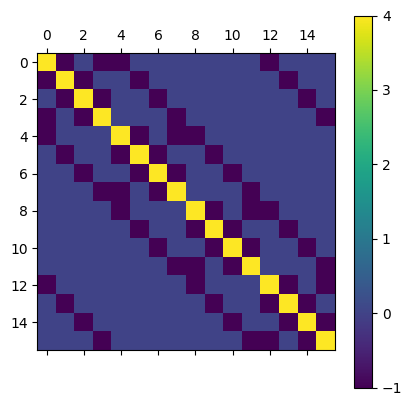

In [590]:
L_2 = np.kron(D, I_4) + np.kron(I_4, D)
print(L_2.real)
plt.matshow(L_2.real)
plt.colorbar()

## Corollary:
$$
L_2 = L \otimes I + I \otimes L \\
= 2 * P_0 \otimes I + (-1) * P_1 \otimes I + (-1) * P_3 \otimes I + I \otimes 2 * P_0 + I \otimes (-1) * P_1 + I \otimes (-1) * P_3 \\
= 2 * (P_0 \otimes I + I \otimes P_0) + (-1) * (P_1 \otimes I + I \otimes  P_1) + (-1) * (P_3 \otimes I + I \otimes P_3) \\
$$
So, what is $P_0 \otimes I + I \otimes P_0$ and so on? Could they be represented by some unitary matrices?

In [591]:
P0_term = np.kron(P0, I_4) + np.kron(I_4, P0)
print(P0_term.real)

[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]


The term $P_0 \otimes I + I \otimes P_0$ is just twice the identity matrix
So the block encoding can be implemented in such a way:


[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


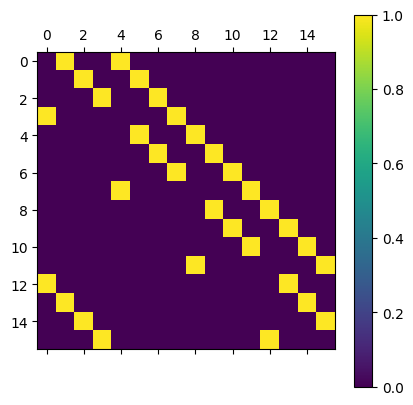

In [592]:
P1_term = np.kron(P1, I_4) + np.kron(I_4, P1)
print(P1_term.real)
plt.matshow(P1_term.real)
plt.colorbar()

Checl if this term is proportional to a unitary matrix

In [593]:
normalized_P1_term = P1_term / np.linalg.norm(P1_term,ord=2)
print((normalized_P1_term @ normalized_P1_term.T).real)
if np.allclose(normalized_P1_term @ normalized_P1_term.T, np.eye(16)):
    print("P1 term is proportional to a unitary matrix")
else:
    print("P1 term is not proportional to a unitary matrix")

[[0.5  0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.25
  0.   0.  ]
 [0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.25 0.  ]
 [0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.25]
 [0.   0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.25 0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.25 0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.25 0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.   0.   0.
  0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.25
  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.5  0.   0.
  0.25 0.  ]


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


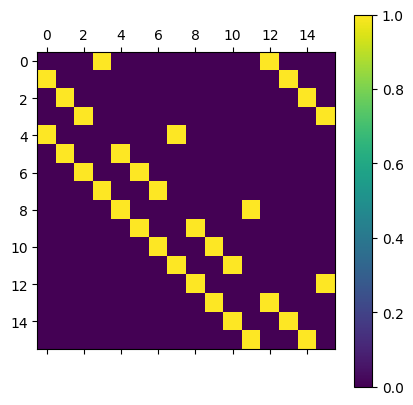

In [594]:
P3_term = np.kron(P3, I_4) + np.kron(I_4, P3)
print(P3_term.real)
plt.matshow(P3_term.real)
plt.colorbar()

This is not a unitary matrix since it is symmetric to $P_1$ term.

## 1.1 First Idea
The result looks bad but P1 term and P3 term looks symmetric.
but we don't have to use it as a whole directly.
If we have a block encoding for $P_1 \otimes I$ = $U_{P_10}, I \otimes P_1$ = $U_{P_11}$, then we can use the following way to implement the block encoding.

## 1.2 Second Idea
The result looks bad but P1 term and P3 term looks symmetric.
Let's try to add them together and see what happens.

[[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]]


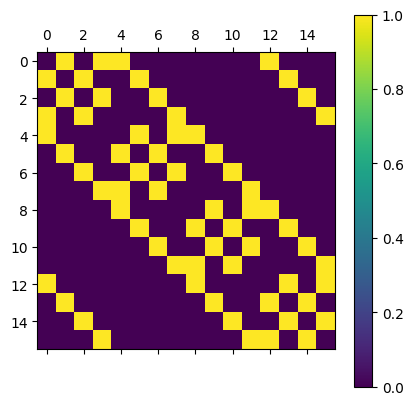

In [595]:
P1_P3_term = P1_term + P3_term
print(P1_P3_term.real)
plt.matshow(P1_P3_term.real)
plt.colorbar()

## Result
$$
L2 = 2 * (2 * I) + (-1) P1\&P3term\\
= 4 * I - P1\&P3_term
$$

Now check if $P_1 \& P_3$ term is proportional to the a unitary matrix

In [596]:
normalized_P1_P3_term = P1_P3_term / np.linalg.norm(P1_P3_term,ord=2)
print((normalized_P1_P3_term @ normalized_P1_P3_term.T).real)
if np.allclose(normalized_P1_P3_term @ normalized_P1_P3_term.T, np.eye(16)):
    print("P1&P3 term is proportional to a unitary matrix")
else:
    print("P1&P3 term is not proportional to a unitary matrix")

[[0.25  0.    0.125 0.    0.    0.125 0.    0.125 0.125 0.    0.    0.
  0.    0.125 0.    0.125]
 [0.    0.25  0.    0.125 0.125 0.    0.125 0.    0.    0.125 0.    0.
  0.125 0.    0.125 0.   ]
 [0.125 0.    0.25  0.    0.    0.125 0.    0.125 0.    0.    0.125 0.
  0.    0.125 0.    0.125]
 [0.    0.125 0.    0.25  0.125 0.    0.125 0.    0.    0.    0.    0.125
  0.125 0.    0.125 0.   ]
 [0.    0.125 0.    0.125 0.25  0.    0.125 0.    0.    0.125 0.    0.125
  0.125 0.    0.    0.   ]
 [0.125 0.    0.125 0.    0.    0.25  0.    0.125 0.125 0.    0.125 0.
  0.    0.125 0.    0.   ]
 [0.    0.125 0.    0.125 0.125 0.    0.25  0.    0.    0.125 0.    0.125
  0.    0.    0.125 0.   ]
 [0.125 0.    0.125 0.    0.    0.125 0.    0.25  0.125 0.    0.125 0.
  0.    0.    0.    0.125]
 [0.125 0.    0.    0.    0.    0.125 0.    0.125 0.25  0.    0.125 0.
  0.    0.125 0.    0.125]
 [0.    0.125 0.    0.    0.125 0.    0.125 0.    0.    0.25  0.    0.125
  0.125 0.    0.125 0.   ]
 [0.    

So, $ P_1 \& P_3 $ term is not a unitary matrix or a scaled unitary matrix.

Can we make it a summation of a banded, circulant and symmetric matrix or toeplitz matrix, or any easier structure can be used to implement?

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

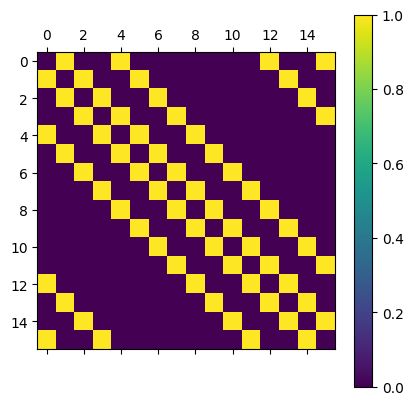

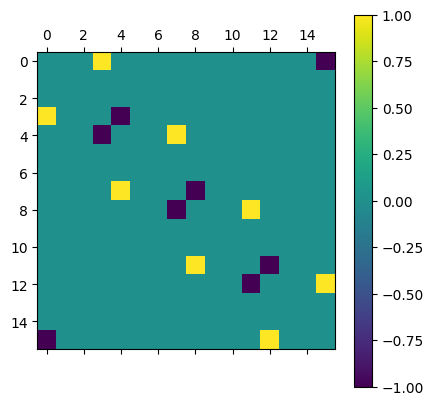

In [597]:
identical_banded_P1_P3_term = np.array([
    [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
    [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
    [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    [0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
    [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
    [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
    [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
    [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
    [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]
])
print(identical_banded_P1_P3_term)
plt.matshow(identical_banded_P1_P3_term)
plt.colorbar()

complement_banded_P1_P3_term = P1_P3_term - identical_banded_P1_P3_term
print(complement_banded_P1_P3_term.real)
plt.matshow(complement_banded_P1_P3_term.real)
plt.colorbar()

This shows that the matrix can be represented by a b,c,s matrix and a complement matrix which is very sparse.
Then, with this idea, what is needed is (1) the implementation of banded, circulant, and symmetric matrix and (2) the implementation of the complement matrix (3) the addition of these two matrices.(1) is known and can be implemented by the LCU,

## 1.2.1 Specific implementation for the banded, circulant, and symmetric matrix part
For the banded, circulant, and symmetric matrix, we can use the LCU to implement it.
the #-1, #-4, #1, #4 band are all 1 band, and the rest are 0.

## 1.2.2 implementation for the complement, sparce matrix part
First check if the complement matrix is proportional to a unitary matrix.

In [598]:
Verification = np.array(complement_banded_P1_P3_term).T @ np.array(complement_banded_P1_P3_term)
print(Verification.real)

[[ 2.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  2.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  2.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  2.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  2.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

Then check if there's any pattern in the matrix.

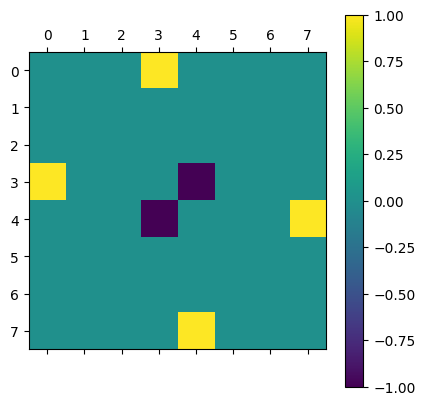

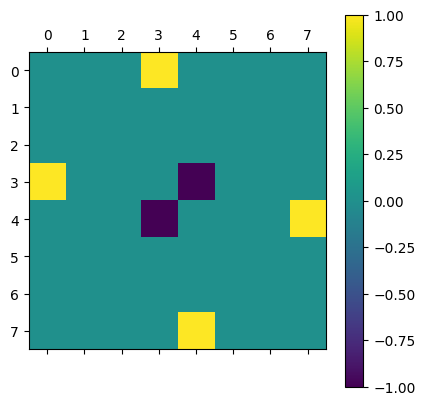

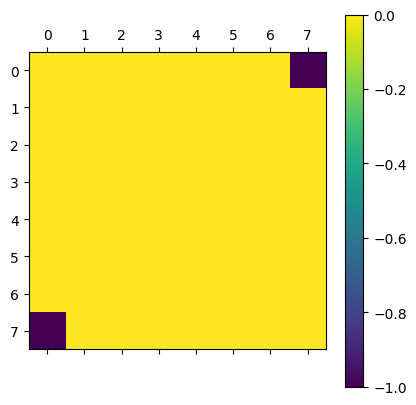

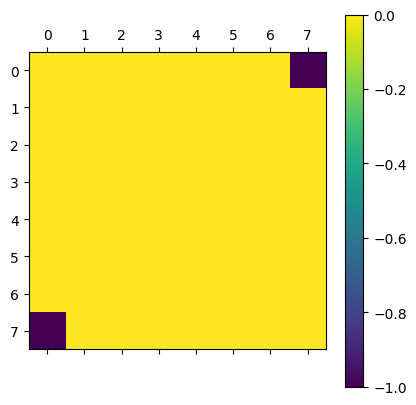

In [599]:
upper_left_complement_banded_P1_P3_term = complement_banded_P1_P3_term[:8, :8]
plt.matshow(upper_left_complement_banded_P1_P3_term.real)
plt.colorbar()
down_right_complement_banded_P1_P3_term = complement_banded_P1_P3_term[8:, 8:]
plt.matshow(down_right_complement_banded_P1_P3_term.real)
plt.colorbar()
upper_right_complement_banded_P1_P3_term = complement_banded_P1_P3_term[:8, 8:]
plt.matshow(upper_right_complement_banded_P1_P3_term.real)
plt.colorbar()
down_left_complement_banded_P1_P3_term = complement_banded_P1_P3_term[8:, :8]
plt.matshow(down_left_complement_banded_P1_P3_term.real)
plt.colorbar()

Obviosly, the matrix in the form of
$$
\begin{bmatrix}
A & B \\
B & A \\

The next problem is how to blcok encode the very sparse matrix that only has little non-zero elements.

## 1.3 Another idea
Can we use smaller fine-strucutre matrices to represent the larger matrix?
For example:
Could we find A, B, C, D, E, F that is fine-structured matrices such that
$$
P_1 \& P_3 = \begin{bmatrix}
A & B \\
B & C
\end{bmatrix} + \begin{bmatrix}
D & E \\
E & F
\end{bmatrix}
$$

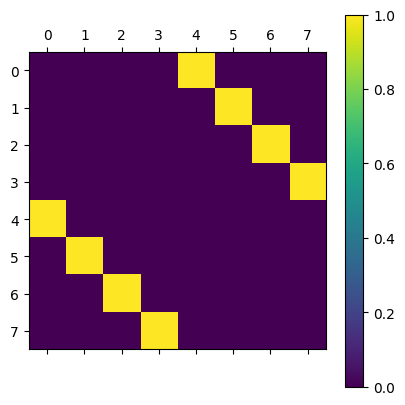

In [600]:
down_left_P1_P3_term = P1_P3_term[8:, :8]
plt.matshow(down_left_P1_P3_term.real)
plt.colorbar()

Well, thus we can see that the left-down part of the matrix is a fine-structured matrix.

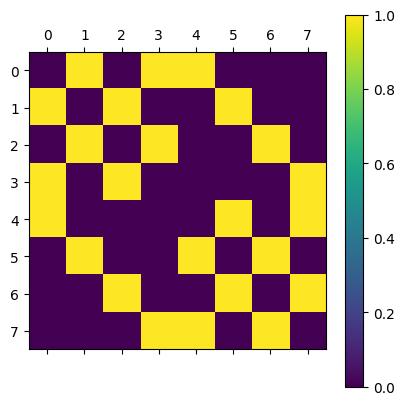

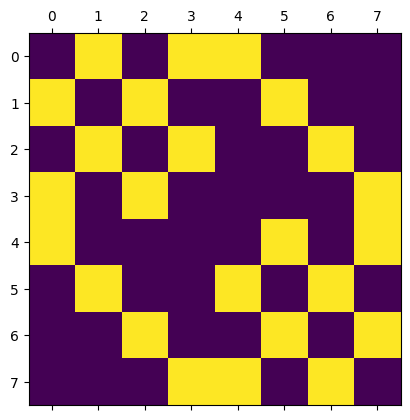

In [601]:
upper_left_P1_P3_term = P1_P3_term[:8, :8]
plt.matshow(upper_left_P1_P3_term.real)
plt.colorbar()
down_right_P1_P3_term = P1_P3_term[8:, 8:]
plt.matshow(down_right_P1_P3_term.real)

So we can see:
$$
P_1 \& P_3 = \begin{bmatrix}
not\ fine & fine \\
fine & not\ fine
\end{bmatrix}
$$

In [602]:
print(upper_left_P1_P3_term.real)

[[0. 1. 0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0. 1. 0.]]


Here, I suddenly the upper left part of upper left part of the matrix is a fine-structured matrix.

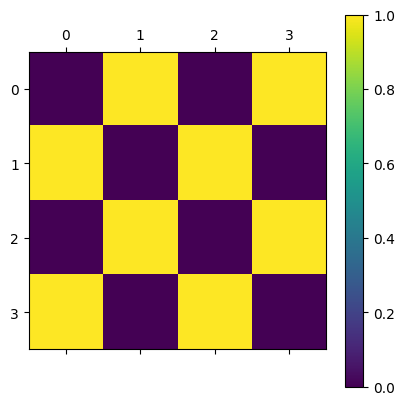

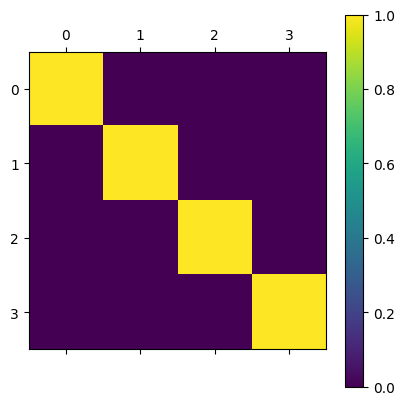

In [603]:
upper_left_upper_left_P1_P3_term = upper_left_P1_P3_term[:4, :4]
plt.matshow(upper_left_upper_left_P1_P3_term.real)
plt.colorbar()
down_left_upper_left_P1_P3_term = upper_left_P1_P3_term[4:, :4]
plt.matshow(down_left_upper_left_P1_P3_term.real)
plt.colorbar()

Let
$$ 
A = \begin{bmatrix}
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0
\end{bmatrix}
B = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} = I
$$
Then,
$$
P_1 \& P_3 = \begin{bmatrix}
A & I & O & I \\
I & A & I & O \\
O & I & A & I \\
I & O & I & A
\end{bmatrix}\\
= \begin{bmatrix}
A & O & O & O \\
O & A & O & O \\
O & O & A & O \\
O & O & O & A \\
\end{bmatrix} + \begin{bmatrix}
O & I & O & I \\
I & O & I & O \\
O & I & O & I \\
I & O & I & O
\end{bmatrix}
= A \otimes I + I \otimes A
$$
But A = P1 + P3, this seems plain.

## 2.0 Addition of two matrices
No matter what idea we use, we need to add the two matrices.
Assume we have orracles for the two matrices, then we can add them by the following way:
If $A = B + C$, assume B and C are unitaries, then
let $\text{PREP}|0> = \frac{1}{\sqrt{2}}(|0> + |1>)$,Here PREP can be a hadamard gate.


Then, let $\text{ADD}|0>|\psi> = |0>B|\psi>$, $\text{ADD}|1>|\psi> = |1>C|\psi>$
Then, 
$$
\begin{align*}
(PREP^{\dag} \otimes I)ADD(PREP \otimes I)|\psi> &= (PREP^{\dag} \otimes I)ADD(\frac{1}{\sqrt{2}}(|0>|\psi> + |1>|\psi>)\\
&= (PREP^{\dag} \otimes I)(\frac{1}{\sqrt{2}}(|0>B|\psi> + |1>C|\psi>)\\
&= \frac{1}{2}(|0>B|\psi> + |1>C|\psi> + |0>B|\psi> - |1>C|\psi>)\\
&= \frac{1}{2}(|0>(B+C)|\psi> + |1>(B-C)|\psi>)\\
&= \frac{1}{2}(|0>A|\psi> + |1>(B-C)|\psi>)
\end{align*}
$$

For example, let A = X + Y,
then let us use quantum circuit to add X and Y and verify the result.

In [604]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import qiskit.visualization as qv
import numpy as np

num_ancilla = 1
num_qubits = 1
qc = QuantumCircuit(num_qubits + num_ancilla)
qc.h(1)
qc.cx(1, 0)
qc.x(1)
qc.cy(1, 0)
qc.x(1)
qc.h(1)

qv.circuit_drawer(qc)
print(qc)
operator = Operator(qc)
print(operator.data)

X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
A = X + Y
if np.allclose(operator.data[0:2, 0:2], A/2):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")

          ┌───┐     ┌───┐          
q_0: ─────┤ X ├─────┤ Y ├──────────
     ┌───┐└─┬─┘┌───┐└─┬─┘┌───┐┌───┐
q_1: ┤ H ├──■──┤ X ├──■──┤ X ├┤ H ├
     └───┘     └───┘     └───┘└───┘
[[ 0. +0.j   0.5-0.5j  0. +0.j  -0.5-0.5j]
 [ 0.5+0.5j  0. +0.j  -0.5+0.5j  0. +0.j ]
 [ 0. +0.j  -0.5-0.5j  0. +0.j   0.5-0.5j]
 [-0.5+0.5j  0. +0.j   0.5+0.5j  0. +0.j ]]
The quantum circuit is correct


## 2.1.1 The implementation of the block encoding by the 1st idea
since we have a way to add two matrices, we can implement the block encoding by the 1st idea.
We have $L_2 = 4 * I - (P_1 \otimes I + I \otimes P_1) - (P_3 \otimes I + I \otimes P_3)$
So $U_{L_2} = U_{4I} +(-1)\dot (U_{P_1 \otimes I} + U_{I \otimes P_1}) +(-1)\dot (U_{P_3 \otimes I} - U_{I \otimes P_3})$
since $U_{4I}$ is just a identity matrix, we do not need to implement it.
So, $L_2 = 4\dot I + (-1) \dot (U_{P_1 \otimes I} + U_{I \otimes P_1}) +(-1)\dot (U_{P_3 \otimes I} - U_{I \otimes P_3})$
$U_{P_1 \otimes I} = U_{P_1} \otimes I$
and $P_1$ is a permutation matrix such that $P_1|j> = |j+1>$
so, let's prepare the permutation matrix.

In [605]:
qc_add1 = QuantumCircuit(2)
qc_add1.cx(0, 1)
qc_add1.x(0)

qc_minus1 = QuantumCircuit(2)
qc_minus1.x(0)
qc_minus1.cx(0, 1)
qc_minus2 = qc_minus1.compose(qc_minus1, [0, 1], front=True)
qc_add2 = qc_add1.compose(qc_add1, [0, 1], front=True)
qv.circuit_drawer(qc_add1)
qv.circuit_drawer(qc_minus1)
print(qc_add1)
print(qc_minus1)

minus_1 = qc_minus1.to_gate(label='minus_1')
add_1 = qc_add1.to_gate(label='add_1')

          ┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└───┘
q_1: ┤ X ├─────
     └───┘     
     ┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [606]:
P_1_I_circuit = QuantumCircuit(4)
P_1_I_circuit.append(minus_1, [2, 3])
I_P_1_circuit = QuantumCircuit(4)
I_P_1_circuit.append(minus_1, [0, 1])
qv.circuit_drawer(P_1_I_circuit)
qv.circuit_drawer(I_P_1_circuit)
print(P_1_I_circuit)
print(I_P_1_circuit)
P_1_I = P_1_I_circuit.to_gate(label='P_1_I')
I_P_1 = I_P_1_circuit.to_gate(label='I_P_1')

                 
q_0: ────────────
                 
q_1: ────────────
     ┌──────────┐
q_2: ┤0         ├
     │  minus_1 │
q_3: ┤1         ├
     └──────────┘
     ┌──────────┐
q_0: ┤0         ├
     │  minus_1 │
q_1: ┤1         ├
     └──────────┘
q_2: ────────────
                 
q_3: ────────────
                 


Then we want to implement the addition of two matrices.

In [607]:
from qiskit import QuantumRegister
ancilla = QuantumRegister(1, 'ancilla')
b_i = QuantumRegister(4, 'b_i')
P_1term_circuit = QuantumCircuit(b_i, ancilla)

P_1term_circuit.h(ancilla)
P_1_I_controlled = P_1_I.control(1)
P_1term_circuit.append(P_1_I_controlled, ancilla[:] + b_i[:])
P_1term_circuit.x(ancilla)
I_P_1_controlled = I_P_1.control(1)
P_1term_circuit.append(I_P_1_controlled, ancilla[:] + b_i[:])
P_1term_circuit.x(ancilla)
P_1term_circuit.h(ancilla)


qv.circuit_drawer(P_1term_circuit)
print(P_1term_circuit)

P_1term = P_1term_circuit.to_gate(label='P_1term')

P_1_r = Operator(P_1term_circuit)
P_1_result = P_1_r.data[0:16, 0:16]*2
if np.allclose(P_1_result, P1_term):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")


              ┌────────┐     ┌────────┐          
  b_i_0: ─────┤0       ├─────┤0       ├──────────
              │        │     │        │          
  b_i_1: ─────┤1       ├─────┤1       ├──────────
              │  P_1_I │     │  I_P_1 │          
  b_i_2: ─────┤2       ├─────┤2       ├──────────
              │        │     │        │          
  b_i_3: ─────┤3       ├─────┤3       ├──────────
         ┌───┐└───┬────┘┌───┐└───┬────┘┌───┐┌───┐
ancilla: ┤ H ├────■─────┤ X ├────■─────┤ X ├┤ H ├
         └───┘          └───┘          └───┘└───┘
The quantum circuit is correct


We can do the same thing for the $P_3 \otimes I$ and $I \otimes P_3$.

In [608]:
P_3_I_circuit = QuantumCircuit(4)
P_3_I_circuit.append(add_1, [2, 3])
I_P_3_circuit = QuantumCircuit(4)
I_P_3_circuit.append(add_1, [0, 1])
qv.circuit_drawer(P_3_I_circuit)
qv.circuit_drawer(I_P_3_circuit)
print(P_3_I_circuit)
print(I_P_3_circuit)

P_3_I = P_3_I_circuit.to_gate(label='P_3_I')
I_P_3 = I_P_3_circuit.to_gate(label='I_P_3')

               
q_0: ──────────
               
q_1: ──────────
     ┌────────┐
q_2: ┤0       ├
     │  add_1 │
q_3: ┤1       ├
     └────────┘
     ┌────────┐
q_0: ┤0       ├
     │  add_1 │
q_1: ┤1       ├
     └────────┘
q_2: ──────────
               
q_3: ──────────
               


In [609]:
P_3term_circuit = QuantumCircuit(b_i, ancilla)
P_3term_circuit.h(ancilla)
P_3_I_controlled = P_3_I.control(1)
P_3term_circuit.append(P_3_I_controlled, ancilla[:] + b_i[:])
P_3term_circuit.x(ancilla)
I_P_3_controlled = I_P_3.control(1)
P_3term_circuit.append(I_P_3_controlled, ancilla[:] + b_i[:])
P_3term_circuit.x(ancilla)
P_3term_circuit.h(ancilla)
qv.circuit_drawer(P_3term_circuit)
print(P_3term_circuit)
P_3term = P_3term_circuit.to_gate(label='P_3term')
P_3_r = Operator(P_3term_circuit)
P_3_result = P_3_r.data[0:16, 0:16]*2
if np.allclose(P_3_result, P3_term):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")


              ┌────────┐     ┌────────┐          
  b_i_0: ─────┤0       ├─────┤0       ├──────────
              │        │     │        │          
  b_i_1: ─────┤1       ├─────┤1       ├──────────
              │  P_3_I │     │  I_P_3 │          
  b_i_2: ─────┤2       ├─────┤2       ├──────────
              │        │     │        │          
  b_i_3: ─────┤3       ├─────┤3       ├──────────
         ┌───┐└───┬────┘┌───┐└───┬────┘┌───┐┌───┐
ancilla: ┤ H ├────■─────┤ X ├────■─────┤ X ├┤ H ├
         └───┘          └───┘          └───┘└───┘
The quantum circuit is correct


Now prepare the prep for a whole combination of the three gates I, P_1term, and P_3term.
Remember that the P_1term, P_3term we got is half of what it should be.

By calculation, the rotation for prep is 2 arccos($\frac{\sqrt{6}}{3}$)

In [610]:
Ancilla = QuantumRegister(2, 'Ancilla')
Prep_circuit = QuantumCircuit(Ancilla)
Prep_circuit.ry(2 * np.arccos(np.sqrt(2) / 2), Ancilla[0])
Prep_circuit.ch(Ancilla[0], Ancilla[1])
qv.circuit_drawer(Prep_circuit)
print(Prep_circuit)
Prep = Prep_circuit.to_gate(label='Prep')

Prep_r = Operator(Prep_circuit)
print(Prep_r.data)
Prep_result = Prep_r.data @ np.array([[1], [0], [0], [0]])
print(Prep_result)

           ┌─────────┐     
Ancilla_0: ┤ Ry(π/2) ├──■──
           └─────────┘┌─┴─┐
Ancilla_1: ───────────┤ H ├
                      └───┘
[[ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.5       +0.j  0.5       +0.j  0.5       +0.j  0.5       +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.5       +0.j  0.5       +0.j -0.5       +0.j -0.5       +0.j]]
[[0.70710678+0.j]
 [0.5       +0.j]
 [0.        +0.j]
 [0.5       +0.j]]


In [611]:
ry_circuit = QuantumCircuit(1)
ry_circuit.ry(2 * np.pi, 0)
ry = ry_circuit.to_gate(label='ry')

In [612]:
q_i = QuantumRegister(5, 'q_i')
Select_circuit = QuantumCircuit(q_i, Ancilla)
P_1term_controlled = P_1term.control(2)
P_3term_controlled = P_3term.control(2)
Select_circuit.append(P_1term_controlled, Ancilla[:] + q_i[:])
Select_circuit.x(Ancilla[1])
Select_circuit.append(P_3term_controlled, Ancilla[:] + q_i[:])
Select_circuit.x(Ancilla[1])
ry_controlled = ry.control(1)
Select_circuit.append(ry_controlled, [Ancilla[0], q_i[4]])

qv.circuit_drawer(Select_circuit)
print(Select_circuit)

           ┌──────────┐     ┌──────────┐      
    q_i_0: ┤0         ├─────┤0         ├──────
           │          │     │          │      
    q_i_1: ┤1         ├─────┤1         ├──────
           │          │     │          │      
    q_i_2: ┤2 P_1term ├─────┤2 P_3term ├──────
           │          │     │          │      
    q_i_3: ┤3         ├─────┤3         ├──────
           │          │     │          │┌────┐
    q_i_4: ┤4         ├─────┤4         ├┤ ry ├
           └────┬─────┘     └────┬─────┘└─┬──┘
Ancilla_0: ─────■────────────────■────────■───
                │      ┌───┐     │      ┌───┐ 
Ancilla_1: ─────■──────┤ X ├─────■──────┤ X ├─
                       └───┘            └───┘ 


                    ┌────────────────┐                     
    q_i_0: ─────────┤0               ├─────────────────────
                    │                │                     
    q_i_1: ─────────┤1               ├─────────────────────
                    │                │                     
    q_i_2: ─────────┤2               ├─────────────────────
                    │                │                     
    q_i_3: ─────────┤3 circuit-15066 ├─────────────────────
                    │                │                     
    q_i_4: ─────────┤4               ├─────────────────────
           ┌───────┐│                │┌───────────────────┐
Ancilla_0: ┤0      ├┤5               ├┤0                  ├
           │  Prep ││                ││  circuit-15058_dg │
Ancilla_1: ┤1      ├┤6               ├┤1                  ├
           └───────┘└────────────────┘└───────────────────┘
[[ 4. -1. -0. -1. -1.  0. -0.  0. -0.  0.  0. -0. -1.  0.  0.  0.]
 [-1.  4. -1.  0.  0. -1.  0. -0.

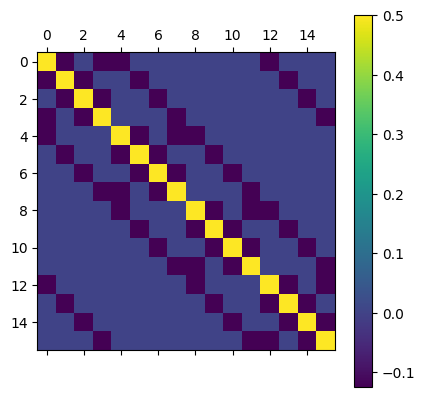

In [613]:
Whole_circuit = QuantumCircuit(q_i, Ancilla)
Whole_circuit.append(Prep, Ancilla)
Whole_circuit.append(Select_circuit, q_i[:] + Ancilla[:])
Whole_circuit.append(Prep.inverse(), Ancilla)
qv.circuit_drawer(Whole_circuit)
print(Whole_circuit)
Whole = Operator(Whole_circuit)
Result = Whole.data[0:16, 0:16]
plt.matshow(Result.real)
plt.colorbar()
print(np.round(Result.real*8, 3))
if np.allclose(Result.real*8, L_2):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")

## 2.1.2 The implementation of the block encoding by the 2nd idea
The well-sturctured matrix can be easily implemented by the LCU.
The we need to find some way to implement the complement matrix.

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

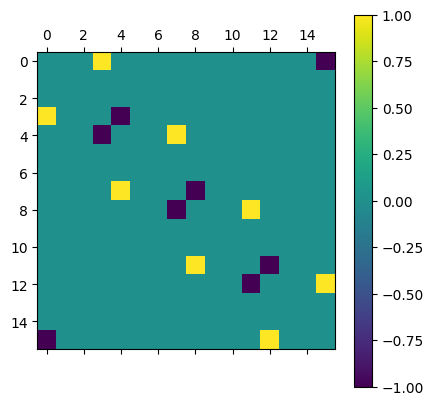

In [614]:
print(complement_banded_P1_P3_term.real)
plt.matshow(complement_banded_P1_P3_term.real)
plt.colorbar()

It has 4 non-zero bands, and each band has an interval of 4.
F|0> = |3> - |15>
F|1> = 0
F|2> = 0
F|3> = |0> - |4>
F|4> = -|3> + |7>
F|5> = 0
F|6> = 0
F|7> = |4> - |8>
F|8> = -|7> + |11>
F|9> = 0
F|10> = 0
F|11> = |8> - |12>
F|12> = -|11> + |15>
F|13> = 0
F|14> = 0
F|15> = |12> - |0>
So the state participates in the computation is $|0>, |3>, |4>, |7>, |8>, |11>, |12>, |15>$

For $|0>, |4>, |8>, |12>$, the transformation is actually |j> -> |j+3> - |j-1>.
For $|3>, |7>, |11>, |15>$, the transformation is actually |j> -> |j-3> - |j+1>.
and |0>, |4>, |8>, |12> is 0000, 0100, 1000, 1100 in binary, are and are the only states that have the last 2 bits to be 00 for four-bit binary.
and |3>, |7>, |11>, |15> is 0011, 0111, 1011, 1111 in binary, are and are the only states that have the last 2 bits to be 11 for four-bit binary.


We hope to control a certain location to be a certain value.
However, it will be not economical to control the value of a certain location to be a certain value for all the entries.
We'd better to keep tearing down the matrix to smaller matrices.

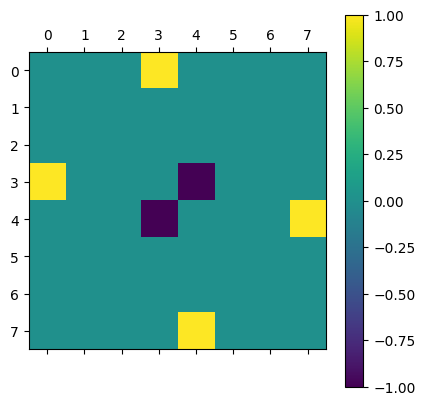

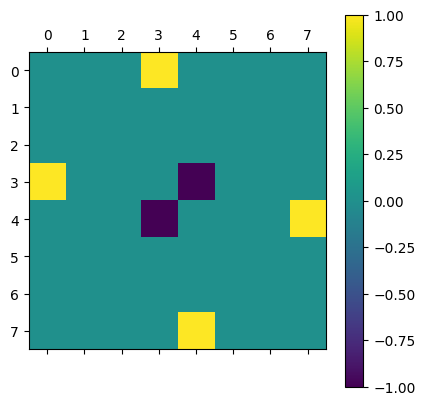

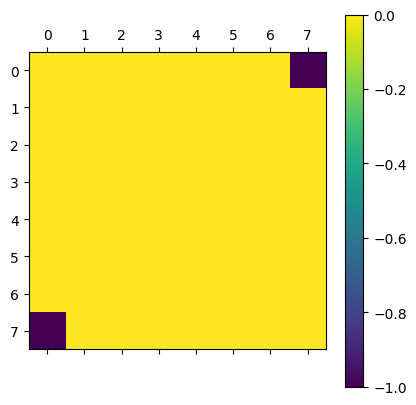

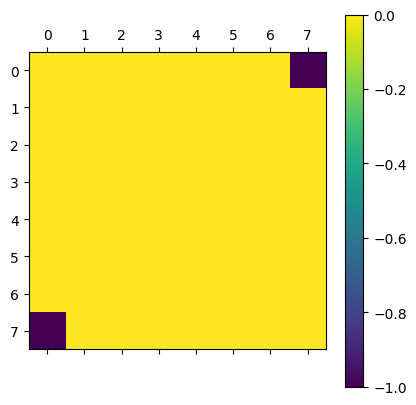

In [615]:
upper_left_complement_banded_P1_P3_term = complement_banded_P1_P3_term[:8, :8]
plt.matshow(upper_left_complement_banded_P1_P3_term.real)
plt.colorbar()
down_right_complement_banded_P1_P3_term = complement_banded_P1_P3_term[8:, 8:]
plt.matshow(down_right_complement_banded_P1_P3_term.real)
plt.colorbar()
upper_right_complement_banded_P1_P3_term = complement_banded_P1_P3_term[:8, 8:]
plt.matshow(upper_right_complement_banded_P1_P3_term.real)
plt.colorbar()
down_left_complement_banded_P1_P3_term = complement_banded_P1_P3_term[8:, :8]
plt.matshow(down_left_complement_banded_P1_P3_term.real)
plt.colorbar()

Let's call upper left to be A, upper right to be B, then the original matrix is
$$
\begin{bmatrix}
A & -B \\
-B & A
\end{bmatrix}
$$

A can be further divided into
$$I \otimes 
\begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}
+(-1) 
 \begin{bmatrix}
 0&1\\
    1&0
    \end{bmatrix}
 \otimes 
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}
+ \begin{bmatrix}
 0&0\\
    1&0
    \end{bmatrix}
 \otimes
 + \begin{bmatrix}
  + 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$
let the first matrix be C, and the second matrix be D,the 2 by 2 matrix be F
Then, the original matrix is
$$
I \otimes (I \otimes C + (-1)F \otimes D^\dag + (-1)F^\dag \otimes D) + (-1)X \otimes B
$$


### 2.1.2.1 A block encoding of very sparse matrix based on orthognal and banded matrix
So, the problem is how we can encode a matrix that a certain location is assigned with a certain value.

For C, we want to assign |3> to |0>, then we need to assign like orthognal matrix.
And if we can make a band in the matrix, it's better.

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


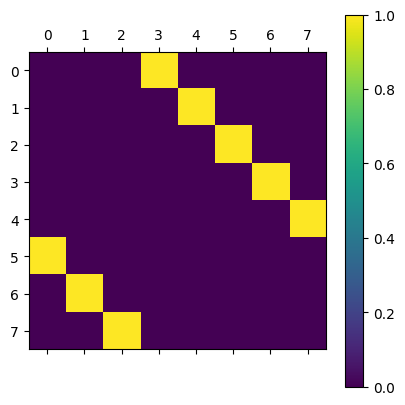

In [616]:
Trial_block = np.array([[0,0,0,1,0,0,0,0],
                        [0,0,0,0,1,0,0,0],
                        [0,0,0,0,0,1,0,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,0,1],
                        [1,0,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0]])
UU_dag = Trial_block @ Trial_block.T
print(UU_dag)
plt.matshow(Trial_block)
plt.colorbar()

This is a banded matrix, can be block encoding, and we can find the target matrix in the upper left corner.

For 
$$
C = \begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}
$$
it is actually $ C = D + D^{\dagger}$
where $D = \begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}$
is encoded (let's call it $U_D$) by the way above.
So $U_C = \frac{U_D + U_D^{\dagger}}{2}$(PS:block addition cost one ancilla qubit,so the + here does not mean $U_C$'s block encoding matrix is purely addtion of $U_D$ and $U_D^{\dagger}$)

And we need $$U_FD + (-1)U_FD^\dag = U_F \otimes U_D^\dag + U_F^\dag \otimes U_D$$

Then we want to block encode B.
$$
B = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$


[[2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 2]]


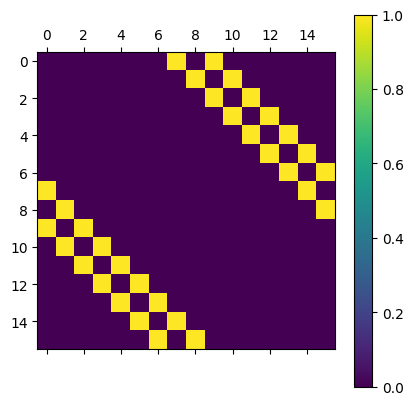

In [617]:
Encode_B = np.array([[0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                     [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                     [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                     [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0]])
plt.matshow(Encode_B)
plt.colorbar()

print(Encode_B @ Encode_B.T)

This is not a good way, since this moddle step is not unitary then it can be implemented by the LCU.But it will cost some more qubits.

So why not block encode
$$
E = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


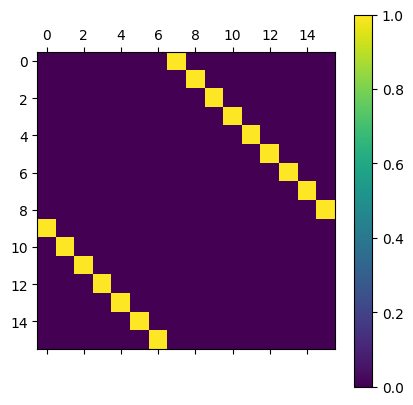

In [618]:
Encode_E = np.array([[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                     [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]])
plt.matshow(Encode_E)
plt.colorbar()
print  (Encode_E @ Encode_E.T)

And then use $U_B = U_E + U_E^{\dagger}$

So
$$
\begin{align*}
L_2 &= 4I + (-1) P_1\&P_3 = 4I + (-1) P + (-1)\overline{P}\\
    & = 4I + (-1) P + (-1)(I \otimes (I \otimes C + X \otimes D) + (-1) X \otimes B)
\end{align*}
$$

$$
\begin{align*}
U_{L_2} &= U_{4I} + (-1) U_P + (-1) U_{\overline{P}}\\
        &= U_{4I} + (-1) U_P + (-1) (U_{I \otimes (I \otimes C + X \otimes D)} + (-1) U_{X \otimes B})\\
        &= U_{4I} + (-1) U_P + (-1) U_{I \otimes (I \otimes C + X \otimes D)} + U_{X \otimes B}\\
        &= 4I + (-1) U_P_{by\ LCU} + (-1) (I \otimes (2 * I \otimes (U_D+U_D^{\dagger})/2 + X \otimes U_D) + 2 * X \otimes (U_E + U_E^{\dagger})/2)
\end{align*}
$$

Now, Let's first implement the good structured matrix.

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


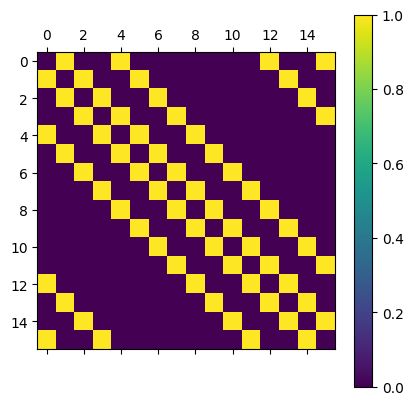

In [619]:
print(identical_banded_P1_P3_term)
plt.matshow(identical_banded_P1_P3_term)
plt.colorbar()

In [620]:
prep_p_ = QuantumRegister(2, 'prep_p')
PREP_P_circuit = QuantumCircuit(prep_p_)
PREP_P_circuit.ry(np.pi / 2, prep_p_[0])
PREP_P_circuit.ch(prep_p_[0], prep_p_[1])
PREP_P_circuit.x(prep_p_[0])
PREP_P_circuit.cry(np.pi / 2, prep_p_[0], prep_p_[1])
PREP_P_circuit.x(prep_p_[0])
qv.circuit_drawer(PREP_P_circuit)
print(PREP_P_circuit)
print(Operator(PREP_P_circuit).data)
PREP_P = PREP_P_circuit.to_gate(label='PREP_P')

          ┌─────────┐     ┌───┐           ┌───┐
prep_p_0: ┤ Ry(π/2) ├──■──┤ X ├─────■─────┤ X ├
          └─────────┘┌─┴─┐└───┘┌────┴────┐└───┘
prep_p_1: ───────────┤ H ├─────┤ Ry(π/2) ├─────
                     └───┘     └─────────┘     
[[ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
 [ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]]


To implement the select here,we need 4 qubits type add1,minus1.

In [629]:
from qiskit.circuit.library import XGate
Add_1_circuit = QuantumCircuit(4)
x = XGate()
trc_x = x.control(3)
Add_1_circuit.append(trc_x, [0, 1, 2, 3])
Add_1_circuit.ccx(0, 1, 2)
Add_1_circuit.cx(0, 1)
Add_1_circuit.x(0)
qv.circuit_drawer(Add_1_circuit)
print(Add_1_circuit)
Add_1 = Add_1_circuit.to_gate(label='Add_1')
print(Operator(Add_1_circuit).data)

Minus_1_circuit = QuantumCircuit(4)
Minus_1_circuit.x(0)
Minus_1_circuit.x(1)
Minus_1_circuit.x(2)
Minus_1_circuit.append(trc_x, [0, 1, 2, 3])
Minus_1_circuit.x(2)
Minus_1_circuit.ccx(0, 1, 2)
Minus_1_circuit.x(1)
Minus_1_circuit.cx(0, 1)
qv.circuit_drawer(Minus_1_circuit)
print(Minus_1_circuit)
Minus_1 = Minus_1_circuit.to_gate(label='Minus_1')
print(Operator(Minus_1_circuit).data)

                    ┌───┐
q_0: ──■────■────■──┤ X ├
       │    │  ┌─┴─┐└───┘
q_1: ──■────■──┤ X ├─────
       │  ┌─┴─┐└───┘     
q_2: ──■──┤ X ├──────────
     ┌─┴─┐└───┘          
q_3: ┤ X ├───────────────
     └───┘               
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j

In [630]:
Add_4_circuit = QuantumCircuit(4)
Add_4_circuit.append(Add_1, [0, 1, 2, 3])
Add_4_circuit.append(Add_1, [0, 1, 2, 3])
Add_4_circuit.append(Add_1, [0, 1, 2, 3])
Add_4_circuit.append(Add_1, [0, 1, 2, 3])
qv.circuit_drawer(Add_4_circuit)
print(Add_4_circuit)
Add_4 = Add_4_circuit.to_gate(label='Add_4')

Minus_4_circuit = QuantumCircuit(4)
Minus_4_circuit.append(Minus_1, [0, 1, 2, 3])
Minus_4_circuit.append(Minus_1, [0, 1, 2, 3])
Minus_4_circuit.append(Minus_1, [0, 1, 2, 3])
Minus_4_circuit.append(Minus_1, [0, 1, 2, 3])
qv.circuit_drawer(Minus_4_circuit)
print(Minus_4_circuit)
Minus_4 = Minus_4_circuit.to_gate(label='Minus_4')

     ┌────────┐┌────────┐┌────────┐┌────────┐
q_0: ┤0       ├┤0       ├┤0       ├┤0       ├
     │        ││        ││        ││        │
q_1: ┤1       ├┤1       ├┤1       ├┤1       ├
     │  Add_1 ││  Add_1 ││  Add_1 ││  Add_1 │
q_2: ┤2       ├┤2       ├┤2       ├┤2       ├
     │        ││        ││        ││        │
q_3: ┤3       ├┤3       ├┤3       ├┤3       ├
     └────────┘└────────┘└────────┘└────────┘
     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐
q_0: ┤0         ├┤0         ├┤0         ├┤0         ├
     │          ││          ││          ││          │
q_1: ┤1         ├┤1         ├┤1         ├┤1         ├
     │  Minus_1 ││  Minus_1 ││  Minus_1 ││  Minus_1 │
q_2: ┤2         ├┤2         ├┤2         ├┤2         ├
     │          ││          ││          ││          │
q_3: ┤3         ├┤3         ├┤3         ├┤3         ├
     └──────────┘└──────────┘└──────────┘└──────────┘


In [631]:
c_Minus_1 = Minus_1.control(2)
c_Add_1 = Add_1.control(2)
c_Minus_4 = Minus_4.control(2)
c_Add_4 = Add_4.control(2)

In [632]:
j_ = QuantumRegister(4, 'j')
Select_circuit = QuantumCircuit(j_, prep_p_)
Select_circuit.append(c_Minus_1, prep_p_[:] + j_[:])
Select_circuit.x(prep_p_[0])
Select_circuit.append(c_Add_1, prep_p_[:] + j_[:])
Select_circuit.x(prep_p_[1])
Select_circuit.append(c_Minus_4, prep_p_[:] + j_[:])
Select_circuit.x(prep_p_[0])
Select_circuit.append(c_Add_4, prep_p_[:] + j_[:])
Select_circuit.x(prep_p_[1])


qv.circuit_drawer(Select_circuit)
print(Select_circuit)

Select = Select_circuit.to_gate(label='Select')

          ┌──────────┐     ┌────────┐     ┌──────────┐     ┌────────┐     
     j_0: ┤0         ├─────┤0       ├─────┤0         ├─────┤0       ├─────
          │          │     │        │     │          │     │        │     
     j_1: ┤1         ├─────┤1       ├─────┤1         ├─────┤1       ├─────
          │  Minus_1 │     │  Add_1 │     │  Minus_4 │     │  Add_4 │     
     j_2: ┤2         ├─────┤2       ├─────┤2         ├─────┤2       ├─────
          │          │     │        │     │          │     │        │     
     j_3: ┤3         ├─────┤3       ├─────┤3         ├─────┤3       ├─────
          └────┬─────┘┌───┐└───┬────┘     └────┬─────┘┌───┐└───┬────┘     
prep_p_0: ─────■──────┤ X ├────■───────────────■──────┤ X ├────■──────────
               │      └───┘    │     ┌───┐     │      └───┘    │     ┌───┐
prep_p_1: ─────■───────────────■─────┤ X ├─────■───────────────■─────┤ X ├
                                     └───┘                           └───┘


In [633]:
P_circuit = QuantumCircuit(j_, prep_p_)
P_circuit.append(PREP_P, prep_p_)
P_circuit.append(Select, j_[:] + prep_p_[:])
P_circuit.append(PREP_P.inverse(), prep_p_)
qv.circuit_drawer(P_circuit)
print(P_circuit)
P = P_circuit.to_gate(label='P')

Result = np.round(Operator(P_circuit).data[0:16, 0:16],3).real
print(Result * 4)
if np.allclose(Result * 4, identical_banded_P1_P3_term):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")

                     ┌─────────┐                     
     j_0: ───────────┤0        ├─────────────────────
                     │         │                     
     j_1: ───────────┤1        ├─────────────────────
                     │         │                     
     j_2: ───────────┤2        ├─────────────────────
                     │  Select │                     
     j_3: ───────────┤3        ├─────────────────────
          ┌─────────┐│         │┌───────────────────┐
prep_p_0: ┤0        ├┤4        ├┤0                  ├
          │  PREP_P ││         ││  circuit-15277_dg │
prep_p_1: ┤1        ├┤5        ├┤1                  ├
          └─────────┘└─────────┘└───────────────────┘
[[ 0.  1.  0. -0.  1.  0.  0.  0. -0.  0.  0.  0.  1. -0.  0.  1.]
 [ 1.  0.  1.  0. -0.  1.  0.  0.  0. -0.  0.  0.  0.  1. -0.  0.]
 [ 0.  1.  0.  1.  0. -0.  1.  0.  0.  0. -0.  0.  0. -0.  1.  0.]
 [ 0.  0.  1. -0.  1.  0.  0.  1. -0.  0.  0. -0. -0.  0. -0.  1.]
 [ 1.  0.  0.  1.  0.  1.  0. 

The next step is to implement the complement matrix.
First is to implement the matrix D.
$$
D = \begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

In [639]:
qc_add1 = QuantumCircuit(3)
qc_add1.ccx(0, 1, 2)
qc_add1.cx(0, 1)
qc_add1.x(0)

qc_minus1 = QuantumCircuit(3)
qc_minus1.x(1)
qc_minus1.x(0)
qc_minus1.ccx(0, 1, 2)
qc_minus1.x(1)
qc_minus1.cx(0, 1)
qc_minus2 = qc_minus1.compose(qc_minus1, [0, 1, 2], front=True)
qc_minus3 = qc_minus1.compose(qc_minus2, [0, 1, 2], front=True)
qc_add2 = qc_add1.compose(qc_add1, [0, 1, 2], front=True)
qc_add3 = qc_add1.compose(qc_add2, [0, 1, 2], front=True)

tr_minus_1 = qc_minus1.to_gate(label='minus_1')
tr_minus_2 = qc_minus2.to_gate(label='minus_2')
tr_minus_3 = qc_minus3.to_gate(label='minus_3')
tr_add_1 = qc_add1.to_gate(label='add_1')
tr_add_2 = qc_add2.to_gate(label='add_2')
tr_add_3 = qc_add3.to_gate(label='add_3')

D_ancilla = QuantumRegister(1, 'D_ancilla')
D_j = QuantumRegister(2, 'D_j')
D_circuit = QuantumCircuit(D_j, D_ancilla)
D_circuit.append(tr_minus_3, D_j[:] + D_ancilla[:])
qv.circuit_drawer(D_circuit)
print(D_circuit)
D = D_circuit.to_gate(label='D')
print(Operator(D_circuit).data)

           ┌──────────┐
    D_j_0: ┤0         ├
           │          │
    D_j_1: ┤1 minus_3 ├
           │          │
D_ancilla: ┤2         ├
           └──────────┘
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Then we want to implement the matrix C.
It is actually $C = D + D^{\dagger}$
so $U_C = \frac{U_D + U_D^{\dagger}}{2}$

In [747]:
F_ancilla = QuantumRegister(1, 'F_ancilla')
F_j = QuantumRegister(1, 'F_j')
F_ciucuit = QuantumCircuit(F_j, F_ancilla)
F_ciucuit.append(minus_1, F_j[:] + F_ancilla[:])
qv.circuit_drawer(F_ciucuit)
print(F_ciucuit)
F = F_ciucuit.to_gate(label='F')
print(Operator(F_ciucuit).data)


           ┌──────────┐
      F_j: ┤0         ├
           │  minus_1 │
F_ancilla: ┤1         ├
           └──────────┘
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [748]:
FD_ancilla = QuantumRegister(1, 'FD_ancilla')
FD_circuit = QuantumCircuit(D_j, F_j, D_ancilla,F_ancilla, FD_ancilla)
U_D_controlled = D.control(1)
U_F_controlled = F.control(1)
U_F_dagger_controlled = F.inverse().control(1)
U_D_dagger_controlled = D.inverse().control(1)
FD_circuit.h(FD_ancilla)
FD_circuit.append(U_D_controlled, FD_ancilla[:] + D_j[:] + D_ancilla[:])
FD_circuit.append(U_F_dagger_controlled, FD_ancilla[:] + F_j[:] + F_ancilla[:])
FD_circuit.x(FD_ancilla)
FD_circuit.append(U_F_controlled, FD_ancilla[:] + F_j[:] + D_ancilla[:])
FD_circuit.append(U_D_dagger_controlled, FD_ancilla[:] + D_j[:] + F_ancilla[:])
FD_circuit.x(FD_ancilla)
FD_circuit.h(FD_ancilla)

qv.circuit_drawer(FD_circuit)
print(FD_circuit)
FD = FD_circuit.to_gate(label='FD')
print(np.round(Operator(FD_circuit).data.real[0:8, 0:8],3))

                 ┌────┐                                 ┌───────────────────┐»
     D_j_0: ─────┤0   ├─────────────────────────────────┤0                  ├»
                 │    │                                 │                   │»
     D_j_1: ─────┤1   ├─────────────────────────────────┤1                  ├»
                 │  D │┌────────────────────┐     ┌────┐│                   │»
       F_j: ─────┤    ├┤0                   ├─────┤0   ├┤  circuit-17512_dg ├»
                 │    ││                    │     │  F ││                   │»
 D_ancilla: ─────┤2   ├┤  circuit-318555_dg ├─────┤1   ├┤                   ├»
                 └─┬──┘│                    │     └─┬──┘│                   │»
 F_ancilla: ───────┼───┤1                   ├───────┼───┤2                  ├»
            ┌───┐  │   └─────────┬──────────┘┌───┐  │   └─────────┬─────────┘»
FD_ancilla: ┤ H ├──■─────────────■───────────┤ X ├──■─────────────■──────────»
            └───┘                            └───┘  

In [648]:
C_ancilla = QuantumRegister(1, 'C_ancilla')
C_j = QuantumRegister(2, 'C_j')
C_circuit = QuantumCircuit(C_j, D_ancilla, C_ancilla)
U_D_controlled = D.control(1)
C_circuit.h(C_ancilla)
C_circuit.append(U_D_controlled, C_ancilla[:] + C_j[:] + D_ancilla[:])
C_circuit.x(C_ancilla)
D_dagger_controlled = D.inverse().control(1)
C_circuit.append(D_dagger_controlled, C_ancilla[:] + C_j[:] + D_ancilla[:])
C_circuit.x(C_ancilla)
C_circuit.h(C_ancilla)
qv.circuit_drawer(C_circuit)
print(C_circuit)
C = C_circuit.to_gate(label='C')
print(np.round(Operator(C_circuit).data.real, 3))
if np.allclose(Operator(C_circuit).data.real[0:4, 0:4], (Operator(D_circuit).data.real + Operator(D_circuit).data.real.T)[0:4, 0:4]/2):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")


                ┌────┐     ┌───────────────────┐          
    C_j_0: ─────┤0   ├─────┤0                  ├──────────
                │    │     │                   │          
    C_j_1: ─────┤1 D ├─────┤1 circuit-17512_dg ├──────────
                │    │     │                   │          
D_ancilla: ─────┤2   ├─────┤2                  ├──────────
           ┌───┐└─┬──┘┌───┐└─────────┬─────────┘┌───┐┌───┐
C_ancilla: ┤ H ├──■───┤ X ├──────────■──────────┤ X ├┤ H ├
           └───┘      └───┘                     └───┘└───┘
[[ 0.  -0.   0.   0.5  0.   0.5  0.   0.   0.  -0.   0.  -0.5  0.   0.5
   0.  -0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.5  0.  -0.   0.   0.   0.  -0.5  0.
   0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.   0.5  0.  -0.   0.   0.   0.  -0.5
   0.   0.5]
 [ 0.5  0.   0.   0.   0.   0.   0.5  0.   0.5  0.  -0.   0.   0.   0.
  -0.5  0. ]
 [ 0.   0.5  0.   0.   0.  -0.   0.   0.5  0.   0.5  0.  -0.   0.  -0.
   0.  -0.5]
 [ 0.5  0.   0.5  0.  -0.   0.  -0.   0.  -0.5 

Then is to implement the matrix E to implement the matrix B.
$$
E = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

In [651]:
E_anclla = QuantumRegister(1, 'E_ancilla')
E_j = QuantumRegister(3, 'E_j')
E_circuit = QuantumCircuit(E_j, E_anclla)
for i in range(7):
    E_circuit.append(Minus_1, E_j[:] + E_anclla[:])
qv.circuit_drawer(E_circuit)
print(E_circuit)
E = E_circuit.to_gate(label='E')
print(Operator(E_circuit).data.real)

           ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
    E_j_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
           │          ││          ││          ││          ││          │»
    E_j_1: ┤1         ├┤1         ├┤1         ├┤1         ├┤1         ├»
           │  Minus_1 ││  Minus_1 ││  Minus_1 ││  Minus_1 ││  Minus_1 │»
    E_j_2: ┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
           │          ││          ││          ││          ││          │»
E_ancilla: ┤3         ├┤3         ├┤3         ├┤3         ├┤3         ├»
           └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«           ┌──────────┐┌──────────┐
«    E_j_0: ┤0         ├┤0         ├
«           │          ││          │
«    E_j_1: ┤1         ├┤1         ├
«           │  Minus_1 ││  Minus_1 │
«    E_j_2: ┤2         ├┤2         ├
«           │          ││          │
«E_ancilla: ┤3         ├┤3         ├
«           └──────────┘└──────────┘
[[0. 0. 0.

Then since $B = E + E^{\dagger}$, we can implement $U_B = \frac{U_E + U_E^{\dagger}}{2}$

In [652]:
B_ancilla = QuantumRegister(1, 'B_ancilla')
B_j = QuantumRegister(3, 'B_j')
B_circuit = QuantumCircuit(B_j, E_anclla, B_ancilla)
U_E_controlled = E.control(1)
E_dagger_controlled = E.inverse().control(1)
B_circuit.h(B_ancilla)
B_circuit.append(U_E_controlled, B_ancilla[:] + B_j[:] + E_anclla[:])
B_circuit.x(B_ancilla)
B_circuit.append(E_dagger_controlled, B_ancilla[:] + B_j[:] + E_anclla[:])
B_circuit.x(B_ancilla)
B_circuit.h(B_ancilla)
qv.circuit_drawer(B_circuit)
print(B_circuit)
B = B_circuit.to_gate(label='B')
print(np.round(Operator(B_circuit).data.real, 3))
if np.allclose(Operator(B_circuit).data.real[0:8, 0:8], (Operator(E_circuit).data.real + Operator(E_circuit).data.real.T)[0:8, 0:8]/2):
    print("The quantum circuit is correct")
else:
    print("The quantum circuit is not correct")

                ┌────┐     ┌───────────────────┐          
    B_j_0: ─────┤0   ├─────┤0                  ├──────────
                │    │     │                   │          
    B_j_1: ─────┤1   ├─────┤1                  ├──────────
                │  E │     │  circuit-18124_dg │          
    B_j_2: ─────┤2   ├─────┤2                  ├──────────
                │    │     │                   │          
E_ancilla: ─────┤3   ├─────┤3                  ├──────────
           ┌───┐└─┬──┘┌───┐└─────────┬─────────┘┌───┐┌───┐
B_ancilla: ┤ H ├──■───┤ X ├──────────■──────────┤ X ├┤ H ├
           └───┘      └───┘                     └───┘└───┘
[[ 0.  0.  0. ... -0.  0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0. -0.  0. ... -0.  0. -0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]]
The quantum circuit is correct


The next step is to implement the whole matrix.
$$
\begin{align*}
L_2 &= 4I + (-1) P_1 \& P_3 = 4I + (-1) P + (-1) \overline{P}\\
    &= 4I + (-1) P + (-1) (I \otimes (I \otimes C + (-1)F \otimes D^\dag + (-1)F^\dag \otimes D) + (-1)X \otimes B)\\
U_{L_2} &= U_{4I} + (-1) U_P + (-1) U_{I \otimes (I \otimes C - F \otimes D^\dag + (-1)F^\dag \otimes D} - U_{X \otimes B}\\
        &= 4I + (-4) U_P_{by\ LCU} + 2 * (-1) (I \otimes (I \otimes (U_D+U_D^{\dagger})/2) + 2 I \otimes (U_FD + U_FD^\dag/2) + 2 *  X \otimes (U_E + U_E^{\dagger})/2)
        \end{align*}
$$
so in total four parts, the first part is $4I$, \
the second part is $-1 U_P_{by\ LCU}$, \
the third part is $-1 I \otimes (I \otimes (U_D+U_D^{\dagger})/2)$, \
the fourth part is $-1 I \otimes (U_FD + U_FD^\dag)$, 
the fifth part is $-1 X \otimes (U_E + U_E^{\dagger})/2$

In [808]:
prep_L2_ = QuantumRegister(3, 'prep_L2')
PREP_L2_circuit = QuantumCircuit(prep_L2_)
PREP_L2_circuit.ry(2 * np.arccos(np.sqrt(3/7)), prep_L2_[0])
PREP_L2_circuit.ch(prep_L2_[0], prep_L2_[1])
PREP_L2_circuit.ccx(prep_L2_[0], prep_L2_[1], prep_L2_[2])
PREP_L2_circuit.x(prep_L2_[0])
PREP_L2_circuit.cry(2 * np.arccos(np.sqrt(1/3)), prep_L2_[0], prep_L2_[1])
hadamar = QuantumCircuit(1)
hadamar.h(0)
hadamar = hadamar.to_gate(label='H')
hadamard_controlled = hadamar.control(2)
PREP_L2_circuit.append(hadamard_controlled, [prep_L2_[0], prep_L2_[1], prep_L2_[2]])
PREP_L2_circuit.x(prep_L2_[0])

qv.circuit_drawer(PREP_L2_circuit)
print(PREP_L2_circuit)
PREP_L2 = PREP_L2_circuit.to_gate(label='PREP_L2')
PREP_L2_r = Operator(PREP_L2_circuit).data @ np.array([[1], [0], [0], [0], [0], [0], [0], [0]])
print(np.round(PREP_L2_r,3))

           ┌────────────┐          ┌───┐                   ┌───┐
prep_L2_0: ┤ Ry(1.7141) ├──■────■──┤ X ├──────■─────────■──┤ X ├
           └────────────┘┌─┴─┐  │  └───┘┌─────┴──────┐  │  └───┘
prep_L2_1: ──────────────┤ H ├──■───────┤ Ry(1.9106) ├──■───────
                         └───┘┌─┴─┐     └────────────┘┌─┴─┐     
prep_L2_2: ───────────────────┤ X ├───────────────────┤ H ├─────
                              └───┘                   └───┘     
[[ 0.378+0.j]
 [ 0.535+0.j]
 [ 0.378+0.j]
 [ 0.   +0.j]
 [-0.   +0.j]
 [ 0.   +0.j]
 [ 0.378+0.j]
 [ 0.535+0.j]]


In [809]:
P_controlled = P.control(3)
B_controlled = B.control(3)
C_controlled = C.control(3)
D_controlled = D.control(3)
FD_controlled = FD.control(3)

In [810]:
x_circuit = QuantumCircuit(1)
x_circuit.x(0)
x_controlled = x.control(3)

In [836]:
R2pi = QuantumCircuit(1)
R2pi.ry(2 * np.pi, 0)
R2pi = R2pi.to_gate(label='R2pi')
R2pi_controlled = R2pi.control(2)

In [841]:
j_L2 = QuantumRegister(4, 'j_L2')
ancilla_L2 = QuantumRegister(9, 'ancilla_L2')
Select_L2_circuit = QuantumCircuit(j_L2, ancilla_L2, prep_L2_)

Select_L2_circuit.x(prep_L2_[0])

Select_L2_circuit.append(FD_controlled, prep_L2_[:] + j_L2[0:3]+ ancilla_L2[0:3])
Select_L2_circuit.x(prep_L2_[2])

Select_L2_circuit.append(x_controlled, prep_L2_[:] + j_L2[3:4])
Select_L2_circuit.append(B_controlled, prep_L2_[:] + j_L2[0:3] + ancilla_L2[3:5])

Select_L2_circuit.x(prep_L2_[1])


Select_L2_circuit.append(C_controlled, prep_L2_[:] + j_L2[0:2]+ ancilla_L2[5:7])

Select_L2_circuit.x(prep_L2_[0])

Select_L2_circuit.append(P_controlled, prep_L2_[:] + j_L2[:] + ancilla_L2[7:9])

Select_L2_circuit.append(R2pi_controlled, prep_L2_[1:3] + j_L2[3:4])

Select_L2_circuit.x(prep_L2_[1])
Select_L2_circuit.x(prep_L2_[2])





qv.circuit_drawer(Select_L2_circuit)
print(Select_L2_circuit)




                   ┌─────┐          ┌────┐     ┌────┐     ┌────┐             
      j_L2_0: ─────┤0    ├──────────┤0   ├─────┤0   ├─────┤0   ├─────────────
                   │     │          │    │     │    │     │    │             
      j_L2_1: ─────┤1    ├──────────┤1   ├─────┤1   ├─────┤1   ├─────────────
                   │     │          │    │     │    │     │    │             
      j_L2_2: ─────┤2    ├──────────┤2   ├─────┤    ├─────┤2   ├─────────────
                   │     │     ┌───┐│    │     │    │     │    │┌──────┐     
      j_L2_3: ─────┤  FD ├─────┤ X ├┤    ├─────┤    ├─────┤3   ├┤ R2pi ├─────
                   │     │     └─┬─┘│    │     │    │     │    │└──┬───┘     
ancilla_L2_0: ─────┤3    ├───────┼──┤  B ├─────┤    ├─────┤    ├───┼─────────
                   │     │       │  │    │     │    │     │    │   │         
ancilla_L2_1: ─────┤4    ├───────┼──┤    ├─────┤  C ├─────┤    ├───┼─────────
                   │     │       │  │    │     │    │     │    │

In [842]:
Select_L2 = Select_L2_circuit.to_gate(label='Select_L2')

In [843]:
Whole_L2_circuit = QuantumCircuit(j_L2, ancilla_L2, prep_L2_)
Whole_L2_circuit.append(PREP_L2, prep_L2_)
Whole_L2_circuit.append(Select_L2, j_L2[:] + ancilla_L2[:] + prep_L2_[:])
Whole_L2_circuit.append(PREP_L2.inverse(), prep_L2_)
qv.circuit_drawer(Whole_L2_circuit)
print(Whole_L2_circuit)

                          ┌─────────────┐                      
      j_L2_0: ────────────┤0            ├──────────────────────
                          │             │                      
      j_L2_1: ────────────┤1            ├──────────────────────
                          │             │                      
      j_L2_2: ────────────┤2            ├──────────────────────
                          │             │                      
      j_L2_3: ────────────┤3            ├──────────────────────
                          │             │                      
ancilla_L2_0: ────────────┤4            ├──────────────────────
                          │             │                      
ancilla_L2_1: ────────────┤5            ├──────────────────────
                          │             │                      
ancilla_L2_2: ────────────┤6            ├──────────────────────
                          │             │                      
ancilla_L2_3: ────────────┤7            

In [844]:
# Whole_L2 = Operator(Whole_L2_circuit)

In [845]:
# Result = Whole_L2.data[0:16, 0:16]
# plt.matshow(Result.real)
# plt.colorbar()
# print(np.round(Result.real*4, 3))

In [846]:
def build_matrix_from_statevectors(num_qubits: int, circuit: QuantumCircuit, active_qubits: list) -> np.ndarray:
    """
    Build the matrix representation of a quantum circuit using the statevector simulator
    :param num_qubits:
    :param circuit:
    :param active_qubits:
    :return:
    """
    backend = Aer.get_backend('statevector_simulator')
    matrix = []
    active_size = len(active_qubits)
    
    for i in range(2 ** active_size):
        test_circuit = QuantumCircuit(num_qubits)
        for qubit in set(range(num_qubits)) - set(active_qubits):
            test_circuit.initialize([1, 0], qubit)
        initial_state = [0] * (2 ** active_size)
        initial_state[i] = 1
        test_circuit.initialize(initial_state, active_qubits)
        test_circuit.compose(circuit, range(num_qubits), inplace=True)
        
        result = backend.run(transpile(test_circuit, backend)).result()
        state_vector = result.get_statevector()
        matrix.append(state_vector)
        print(np.round(state_vector*14,3),end=' '  )

    return np.array(matrix).T

statevector simulation is not a good way to implement the matrix, since it takes too much time.

In [847]:
from qiskit_aer import Aer
from qiskit import transpile, assemble


def build_matrix_from_unitary(circuit: QuantumCircuit) -> np.ndarray:
    """
    Build the matrix representation of a quantum circuit using the unitary simulator
    :param circuit: 
    :return: 
    """
    backend = Aer.get_backend('unitary_simulator')
    job = assemble(transpile(circuit, backend))
    result = backend.run(job).result()
    unitary = result.get_unitary()
    
    return unitary

[ 4.+0.j -1.-0.j -0.+0.j ...  0.+0.j -0.+0.j -0.+0.j] [-1.-0.j  4.+0.j -1.-0.j ...  0.+0.j  0.+0.j  0.+0.j] [ 0.+0.j -1.-0.j  4.+0.j ...  0.-0.j  0.+0.j  0.+0.j] [-1.-0.j  0.+0.j -1.-0.j ... -0.+0.j  0.-0.j  0.+0.j] [-1.-0.j  0.+0.j  0.+0.j ... -0.-0.j  0.-0.j  0.-0.j] [-0.-0.j -1.-0.j  0.-0.j ... -0.+0.j -0.-0.j -0.-0.j] [-0.-0.j -0.-0.j -1.-0.j ... -0.+0.j  0.+0.j -0.-0.j] [ 0.-0.j -0.-0.j -0.-0.j ... -0.+0.j -0.+0.j -0.+0.j] [ 0.+0.j  0.+0.j -0.-0.j ...  0.-0.j  0.-0.j  0.+0.j] [-0.+0.j  0.+0.j  0.+0.j ...  0.-0.j  0.-0.j -0.-0.j] [-0.+0.j -0.+0.j  0.+0.j ... -0.-0.j -0.-0.j  0.-0.j] [-0.-0.j -0.+0.j -0.+0.j ...  0.+0.j -0.-0.j  0.-0.j] [-1.-0.j  0.-0.j  0.-0.j ...  0.+0.j -0.+0.j -0.+0.j] [-0.-0.j -1.-0.j  0.-0.j ... -0.+0.j  0.+0.j -0.+0.j] [ 0.-0.j -0.-0.j -1.-0.j ...  0.+0.j  0.-0.j  0.+0.j] [-0.-0.j  0.-0.j -0.-0.j ...  0.+0.j  0.+0.j  0.-0.j] 

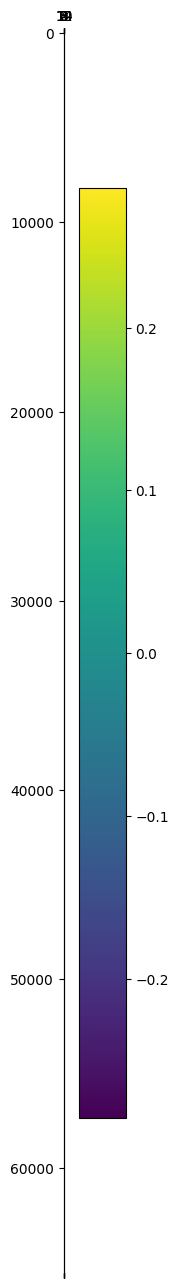

In [848]:
Result = build_matrix_from_statevectors(16, Whole_L2_circuit, [0, 1, 2, 3])
plt.matshow(Result.real)
plt.colorbar()

[[ 4. -1.  0. -1. -1. -0. -0.  0.  0. -0. -0. -0. -1. -0.  0. -0.]
 [-1.  4. -1.  0.  0. -1. -0. -0.  0.  0. -0. -0.  0. -1. -0.  0.]
 [-0. -1.  4. -1.  0.  0. -1. -0. -0.  0.  0. -0.  0.  0. -1. -0.]
 [-1. -0. -1.  4. -0. -0.  0. -1. -0.  0.  0.  0. -0.  0.  0. -1.]
 [-1. -0.  0. -0.  4. -1.  0. -1. -1. -0. -0.  0.  0. -0. -0.  0.]
 [ 0. -1. -0. -0. -1.  4. -1.  0.  0. -1. -0. -0.  0.  0. -0.  0.]
 [ 0. -0. -1. -0. -0. -1.  4. -1. -0. -0. -1. -0. -0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -0. -1.  4.  0. -0. -0. -1.  0.  0.  0.  0.]
 [-0. -0.  0. -0. -1. -0.  0. -0.  4. -1.  0. -1. -1. -0. -0. -0.]
 [ 0. -0. -0. -0.  0. -1. -0.  0. -1.  4. -1.  0.  0. -1. -0. -0.]
 [-0.  0. -0. -0.  0.  0. -1. -0. -0. -1.  4. -1.  0. -0. -1. -0.]
 [-0.  0.  0. -0. -0.  0.  0. -1. -1. -0. -1.  4. -0. -0.  0. -1.]
 [-1. -0. -0. -0. -0. -0. -0. -0. -1. -0.  0. -0.  4. -1.  0. -1.]
 [ 0. -1. -0. -0. -0. -0. -0. -0.  0. -1. -0. -0. -1.  4. -1.  0.]
 [-0. -0. -1. -0. -0.  0. -0.  0.  0. -0. -1. -0. -0. -1.  4. 

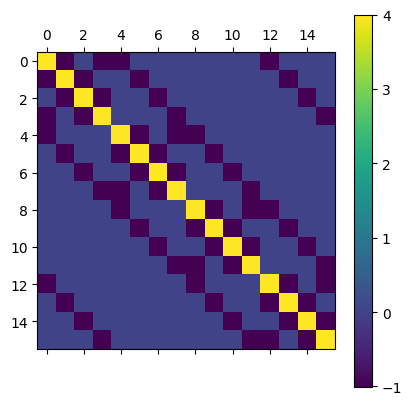

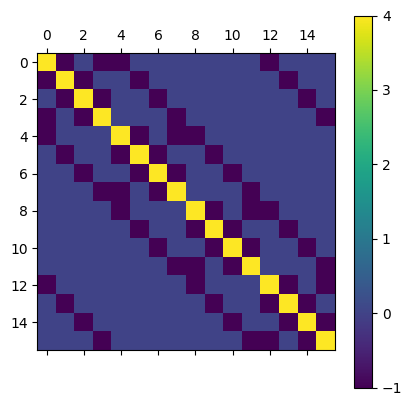

In [849]:
plt.matshow(Result.real[0:16, 0:16]*14)
plt.colorbar()
plt.matshow(L_2.real)
plt.colorbar()
print(np.round(Result.real*14, 3)[0:16, 0:16])
file = open('matrix_record_L_2.txt', 'a+')
file.seek(0)
read = file.read()
if read != '':
    result = eval(read)
    result = np.array(result)
    file.close()
else:
    result = Result
    file.write(repr(result.tolist()) + '\n')
    file.close()
print(L_2.real)


[[ 4.  1.  0.  4.  1.  0.  0.  0.  0. -0. -0.  0.  1.  0.  0.  5.]
 [ 1.  4.  1.  0. -0.  1. -0.  0.  0.  0. -0. -0. -0.  1.  0.  0.]
 [-0.  1.  4.  1. -0.  0.  1.  0.  0.  0.  0. -0.  0.  0.  1.  0.]
 [ 4. -0.  1.  4.  9. -0.  0.  1.  0.  0.  0.  0. -0. -0. -0.  1.]
 [ 1. -0. -0.  9.  4.  1.  0.  4.  1. -0.  0.  0.  0. -0. -0.  0.]
 [ 0.  1.  0.  0.  1.  4.  1.  0. -0.  1. -0. -0.  0.  0. -0. -0.]
 [-0.  0.  1.  0. -0.  1.  4.  1. -0. -0.  1. -0. -0.  0.  0.  0.]
 [-0. -0. -0.  1.  4. -0.  1.  4.  5. -0. -0.  1.  0.  0.  0.  0.]
 [-0. -0. -0. -0.  1.  0.  0.  5.  4.  1.  0.  4.  1.  0.  0.  0.]
 [ 0. -0. -0. -0. -0.  1.  0.  0.  1.  4.  1.  0. -0.  1. -0.  0.]
 [-0.  0. -0. -0.  0.  0.  1.  0. -0.  1.  4.  1. -0.  0.  1.  0.]
 [-0.  0.  0. -0.  0. -0. -0.  1.  4. -0.  1.  4.  9. -0.  0.  1.]
 [ 1. -0.  0.  0. -0. -0. -0. -0.  1. -0. -0.  9.  4.  1.  0.  4.]
 [-0.  1. -0.  0.  0. -0. -0. -0.  0.  1.  0.  0.  1.  4.  1.  0.]
 [-0. -0.  1. -0. -0.  0. -0.  0. -0.  0.  1.  0. -0.  1.  4.  1.]
 [ 5. -0. -0.  1. -0.  0.  0. -0. -0.  0. -0.  1.  4. -0.  1.  4.]]

## 2.1.2.3 Conclusion
Although the quantum circuit based on 2nd idea costs more.
But it shows a more general way to implement a bad-shaped matrix.
From this 

# 2.1.3 The third idea
By decomposing A, we can get this idea is a variant of the first idea.

# 3.0 Improvement
## 3.1 The first idea: Adding the matrix with the same coeficient using the same controlled state
We can find sometimes when we add some matrices, they have the same coeficient.
So could we use the same controlled state to control them?


Lets think about it:
$$
A = \begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
B = \begin{bmatrix}
e & f\\
g & h
\end{bmatrix}\\
|1><1|\otimes A + |0><0|\otimes I = \begin{bmatrix}
0 & 0\\
0 & 1\\
\end{bmatrix} \otimes A + \begin{bmatrix}
1 & 0\\
0 & 0\\
\end{bmatrix} \otimes I = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & a & b\\
0 & 0 & c & d
\end{bmatrix}
$$

Then 
$$
|0><0|\otimes B + |1><1|\otimes I = \begin{bmatrix}
e & f & 0 & 0\\
g & h & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$
(|0><0|\otimes B + |1><1|\otimes I)(|1><1|\otimes A + |0><0|\otimes I) = \begin{bmatrix}
e & f & 0 & 0\\
g & h & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & a & b\\
0 & 0 & c & d
\end{bmatrix} = \begin{bmatrix}
e & f & 0 & 0\\
g & h & 0 & 0\\
0 & 0 & a & b\\
0 & 0 & c & d
\end{bmatrix}
$$


$$
(H\otimes I)\times
\begin{bmatrix}
e & f & 0 & 0\\
g & h & 0 & 0\\
0 & 0 & a & b\\
0 & 0 & c & d
\end{bmatrix}\times
(H\otimes I) = 
$$

$$
\begin{bmatrix}
\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}}
\end{bmatrix}\times
\begin{bmatrix}
e & f & 0 & 0\\
g & h & 0 & 0\\
0 & 0 & a & b\\
0 & 0 & c & d
\end{bmatrix}\times
\begin{bmatrix}
\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}}
\end{bmatrix}
$$

$$
\begin{pmatrix}\frac{a+e}{2}&\frac{f+b}{2}&\frac{e-a}{2}&\frac{f-b}{2}\\ \frac{g+c}{2}&\frac{h+d}{2}&\frac{g-c}{2}&\frac{h-d}{2}\\ \frac{e-a}{2}&\frac{f-b}{2}&\frac{a+e}{2}&\frac{f+b}{2}\\ \frac{g-c}{2}&\frac{h-d}{2}&\frac{g+c}{2}&\frac{h+d}{2}\end{pmatrix}
$$

if it is |1><1|\otimes B + |0><0|\otimes I, then the matrix is not like that.
So we couldn't use the same control state.

In [854]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)
qc.cy(1, 0)
qc.h(1)

qv.circuit_drawer(qc)
print(qc)
print(Operator(qc).data)

qc1 = QuantumCircuit(2)
qc1.h(1)
qc1.cx(1, 0)
qc1.x(1)
qc1.cy(1, 0)
qc1.x(1)
qc1.h(1)
qv.circuit_drawer(qc1)
print(qc1)
print(Operator(qc1).data)

          ┌───┐┌───┐     
q_0: ─────┤ X ├┤ Y ├─────
     ┌───┐└─┬─┘└─┬─┘┌───┐
q_1: ┤ H ├──■────■──┤ H ├
     └───┘          └───┘
[[0.5-0.5j 0. +0.j  0.5+0.5j 0. +0.j ]
 [0. +0.j  0.5+0.5j 0. +0.j  0.5-0.5j]
 [0.5+0.5j 0. +0.j  0.5-0.5j 0. +0.j ]
 [0. +0.j  0.5-0.5j 0. +0.j  0.5+0.5j]]
          ┌───┐     ┌───┐          
q_0: ─────┤ X ├─────┤ Y ├──────────
     ┌───┐└─┬─┘┌───┐└─┬─┘┌───┐┌───┐
q_1: ┤ H ├──■──┤ X ├──■──┤ X ├┤ H ├
     └───┘     └───┘     └───┘└───┘
[[ 0. +0.j   0.5-0.5j  0. +0.j  -0.5-0.5j]
 [ 0.5+0.5j  0. +0.j  -0.5+0.5j  0. +0.j ]
 [ 0. +0.j  -0.5-0.5j  0. +0.j   0.5-0.5j]
 [-0.5+0.5j  0. +0.j   0.5+0.5j  0. +0.j ]]


## 3.2. The second idea: Overlap of ancilla qubits
The cost of ancilla qubit between the first idea and the second idea is very different.
The first idea costs 3 ancilla qubit, while the second idea costs 12 ancilla qubits.
The difference that raise this difference is that when implementing the matrix, the first idea put all the ancilla qubits of unitaries that need to be added up on the same qubit, while the second idea put them on different qubits.



                   ┌─────┐          ┌────┐     ┌────┐     ┌────┐             
      j_L2_0: ─────┤0    ├──────────┤0   ├─────┤0   ├─────┤0   ├─────────────
                   │     │          │    │     │    │     │    │             
      j_L2_1: ─────┤1    ├──────────┤1   ├─────┤1   ├─────┤1   ├─────────────
                   │     │          │    │     │    │     │    │             
      j_L2_2: ─────┤2    ├──────────┤2   ├─────┤    ├─────┤2   ├─────────────
                   │     │     ┌───┐│  B │     │  C │     │  P │┌──────┐     
      j_L2_3: ─────┤  FD ├─────┤ X ├┤    ├─────┤    ├─────┤3   ├┤ R2pi ├─────
                   │     │     └─┬─┘│    │     │    │     │    │└──┬───┘     
ancilla_L2_0: ─────┤3    ├───────┼──┤3   ├─────┤2   ├─────┤4   ├───┼─────────
                   │     │       │  │    │     │    │     │    │   │         
ancilla_L2_1: ─────┤4    ├───────┼──┤4   ├─────┤3   ├─────┤5   ├───┼─────────
                   │     │       │  └─┬──┘     └─┬──┘     └─┬──┘

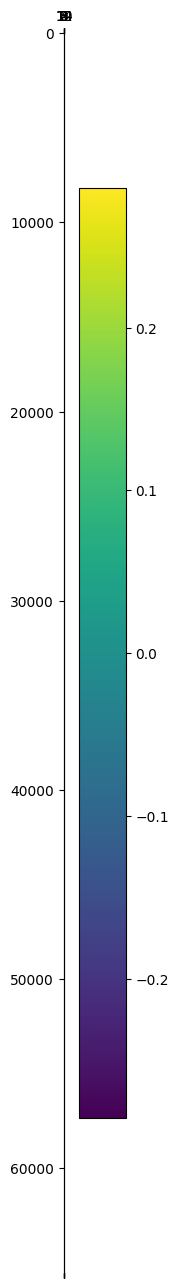

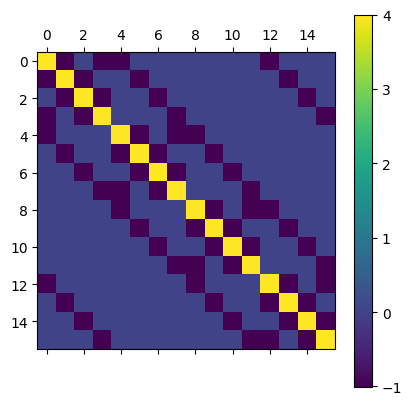

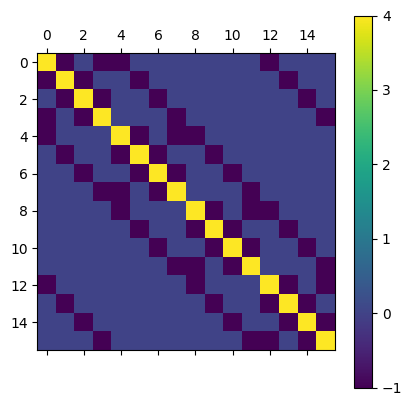

In [855]:
j_L2 = QuantumRegister(4, 'j_L2')
ancilla_L2 = QuantumRegister(3, 'ancilla_L2')
Select_L2_circuit = QuantumCircuit(j_L2, ancilla_L2, prep_L2_)

Select_L2_circuit.x(prep_L2_[0])

Select_L2_circuit.append(FD_controlled, prep_L2_[:] + j_L2[0:3]+ ancilla_L2[0:3])
Select_L2_circuit.x(prep_L2_[2])

Select_L2_circuit.append(x_controlled, prep_L2_[:] + j_L2[3:4])
Select_L2_circuit.append(B_controlled, prep_L2_[:] + j_L2[0:3] + ancilla_L2[0:2])

Select_L2_circuit.x(prep_L2_[1])


Select_L2_circuit.append(C_controlled, prep_L2_[:] + j_L2[0:2]+ ancilla_L2[0:2])

Select_L2_circuit.x(prep_L2_[0])

Select_L2_circuit.append(P_controlled, prep_L2_[:] + j_L2[:] + ancilla_L2[0:2])

Select_L2_circuit.append(R2pi_controlled, prep_L2_[1:3] + j_L2[3:4])

Select_L2_circuit.x(prep_L2_[1])
Select_L2_circuit.x(prep_L2_[2])





qv.circuit_drawer(Select_L2_circuit)
print(Select_L2_circuit)

Select_L2 = Select_L2_circuit.to_gate(label='Select_L2')
Whole_L2_circuit = QuantumCircuit(j_L2, ancilla_L2, prep_L2_)
Whole_L2_circuit.append(PREP_L2, prep_L2_)
Whole_L2_circuit.append(Select_L2, j_L2[:] + ancilla_L2[:] + prep_L2_[:])
Whole_L2_circuit.append(PREP_L2.inverse(), prep_L2_)
qv.circuit_drawer(Whole_L2_circuit)
print(Whole_L2_circuit)

Result2 = build_matrix_from_statevectors(10, Whole_L2_circuit, [0, 1, 2, 3])
plt.matshow(Result.real)
plt.colorbar()
plt.matshow(Result.real[0:16, 0:16]*14)
plt.colorbar()
plt.matshow(L_2.real)
plt.colorbar()
print(np.round(Result.real*14, 3)[0:16, 0:16])
file = open('matrix_record_L_2.txt', 'a+')
file.seek(0)
read = file.read()
if read != '':
    result = eval(read)
    result = np.array(result)
    file.close()
else:
    result = Result
    file.write(repr(result.tolist()) + '\n')
    file.close()
print(L_2.real)

In [860]:
print(Operator(F_ciucuit).data.real)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [856]:
FD_ancilla = QuantumRegister(1, 'FD_ancilla')
FD_circuit = QuantumCircuit(D_j, F_j, D_ancilla,F_ancilla, FD_ancilla)
U_D_controlled = D.control(1)
U_F_controlled = F.control(1)
U_F_dagger_controlled = F.inverse().control(1)
U_D_dagger_controlled = D.inverse().control(1)
FD_circuit.h(FD_ancilla)
FD_circuit.append(U_D_controlled, FD_ancilla[:] + D_j[:] + D_ancilla[:])
FD_circuit.append(U_F_dagger_controlled, FD_ancilla[:] + F_j[:] + F_ancilla[:])
FD_circuit.x(FD_ancilla)
FD_circuit.append(U_F_controlled, FD_ancilla[:] + F_j[:] + D_ancilla[:])
FD_circuit.append(U_D_dagger_controlled, FD_ancilla[:] + D_j[:] + F_ancilla[:])
FD_circuit.x(FD_ancilla)
FD_circuit.h(FD_ancilla)

qv.circuit_drawer(FD_circuit)
print(FD_circuit)
FD = FD_circuit.to_gate(label='FD')
print(np.round(Operator(FD_circuit).data.real[0:8, 0:8],3))

                 ┌────┐                                 ┌───────────────────┐»
     D_j_0: ─────┤0   ├─────────────────────────────────┤0                  ├»
                 │    │                                 │                   │»
     D_j_1: ─────┤1   ├─────────────────────────────────┤1                  ├»
                 │  D │┌────────────────────┐     ┌────┐│                   │»
       F_j: ─────┤    ├┤0                   ├─────┤0   ├┤  circuit-17512_dg ├»
                 │    ││                    │     │  F ││                   │»
 D_ancilla: ─────┤2   ├┤  circuit-318555_dg ├─────┤1   ├┤                   ├»
                 └─┬──┘│                    │     └─┬──┘│                   │»
 F_ancilla: ───────┼───┤1                   ├───────┼───┤2                  ├»
            ┌───┐  │   └─────────┬──────────┘┌───┐  │   └─────────┬─────────┘»
FD_ancilla: ┤ H ├──■─────────────■───────────┤ X ├──■─────────────■──────────»
            └───┘                            └───┘  

This improvement shows that sometimes the ancilla qubits can be overlapped. We can use this to reduce the cost of ancilla qubits.
Why we can do this sometimes but not always?

I think this is because of the property of the addition.
##### THM: If the ancilla qubit is prepared for addtion(assembly) of several unitaries. Then the zero state that input into the ancilla qubit will keep zero state after passing through this assembled unitary.

So if we have the ancilla qubit is prepared for addtion(assembly) of several unitaries, then we can overlap the ancilla qubits.

# 4. Thinking
For a M by M Laplacian matrix, we need log(M) ancilla qubits to represent the matrix.
If we use the first idea, we need log(M) + 1 ancilla qubits to implement the matrix.

And we know the quantum circuit can only represent unitary matrix, so we need to decompose the matrix into unitary matrix.